In [1]:
def func(x):
    return x**3 - 5 * x-9

def bisection_method(func, a, b, tolerance):
    iteration = 1
    while True:
        midpoint = (a + b) / 2
        f_mid = func(midpoint)
        print(f"Iteration={iteration}, x = {midpoint:.6f}, f(x) = {f_mid:.6f}")
        
        # Update the bracket
        if func(a) * f_mid < 0:
            b = midpoint
        else:
            a = midpoint
            
        # Check if the root is found within tolerance
        if abs(f_mid) <= tolerance:
            print(f"Required Root is: {midpoint:.8f}")
            return midpoint
            
        iteration += 1

def main():
    print("BISECTION METHOD IMPLEMENTATION")
    print()
    
    # Default values
    function_str = "x**3 - 5 * x - 9"
    a, b, tolerance = 2, 3, 0.0001
    
    # Define the function to solve
    def func(x):
        return eval(function_str)
    
    print(f"f(x) = {function_str}")
    print(f"a = {a}, b = {b}, tolerance = {tolerance}")
    print()
    
    # Check if the guesses bracket the root
    if func(a) * func(b) >= 0:
        print("Error: The guesses do not bracket a root. Try again with different values.")
        return
        
    # Perform the bisection method
    bisection_method(func, a, b, tolerance)

if __name__ == "__main__":
    main()

BISECTION METHOD IMPLEMENTATION

f(x) = x**3 - 5 * x - 9
a = 2, b = 3, tolerance = 0.0001

Iteration=1, x = 2.500000, f(x) = -5.875000
Iteration=2, x = 2.750000, f(x) = -1.953125
Iteration=3, x = 2.875000, f(x) = 0.388672
Iteration=4, x = 2.812500, f(x) = -0.815186
Iteration=5, x = 2.843750, f(x) = -0.221588
Iteration=6, x = 2.859375, f(x) = 0.081448
Iteration=7, x = 2.851562, f(x) = -0.070592
Iteration=8, x = 2.855469, f(x) = 0.005297
Iteration=9, x = 2.853516, f(x) = -0.032680
Iteration=10, x = 2.854492, f(x) = -0.013700
Iteration=11, x = 2.854980, f(x) = -0.004204
Iteration=12, x = 2.855225, f(x) = 0.000546
Iteration=13, x = 2.855103, f(x) = -0.001829
Iteration=14, x = 2.855164, f(x) = -0.000641
Iteration=15, x = 2.855194, f(x) = -0.000048
Required Root is: 2.85519409


In [2]:
def secant_method(f, x0, x1, epsilon=1e-6, max_iterations=100):
    
    iterations = 0
    
    print(f"{'Iter':<6}{'x_n-1':<12}{'x_n':<12}{'f(x_n)':<12}{'x_n+1':<12}")
    print("-" * 54)
    
    while iterations < max_iterations:
        # Calculate function values
        f_x0 = f(x0)
        f_x1 = f(x1)
        
        # Check if x1 is already a root
        if abs(f_x1) < epsilon:
            print(f"{iterations+1:<6}{x0:<12.6f}{x1:<12.6f}{f_x1:<12.6f}{'--':<12}")
            return x1, iterations + 1
        
        # Check for division by zero
        if f_x1 - f_x0 == 0:
            print("Error: Division by zero encountered!")
            return None, iterations + 1
        
        # Calculate the next approximation
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        # Display current iteration information
        print(f"{iterations+1:<6}{x0:<12.6f}{x1:<12.6f}{f_x1:<12.6f}{x2:<12.6f}")
        
        # Check for convergence
        if abs(x2 - x1) < epsilon:
            return x2, iterations + 1
        
        # Update values for next iteration
        x0, x1 = x1, x2
        iterations += 1
    
    print("Warning: Maximum iterations reached!")
    return x1, iterations

def main():
    print("SECANT METHOD ROOT FINDER")
    print("========================")
    
    # Example function: x^3 - 5x - 9
    def example_function(x):
        return x**3 - 5*x - 9
    
    # Initial guesses
    x0, x1 = 2, 3
    
    print(f"Finding root of f(x) = x^3 - 5x - 9 using initial guesses x0 = {x0} and x1 = {x1}")
    print()
    
    root, steps = secant_method(example_function, x0, x1)
    
    if root is not None:
        print()
        print(f"Root found: {root:.8f}")
        print(f"Function value at root: {example_function(root):.8e}")
        print(f"Iterations required: {steps}")

if __name__ == "__main__":
    main()

SECANT METHOD ROOT FINDER
Finding root of f(x) = x^3 - 5x - 9 using initial guesses x0 = 2 and x1 = 3

Iter  x_n-1       x_n         f(x_n)      x_n+1       
------------------------------------------------------
1     2.000000    3.000000    3.000000    2.785714    
2     3.000000    2.785714    -1.310860   2.850875    
3     2.785714    2.850875    -0.083923   2.855332    
4     2.850875    2.855332    0.002635    2.855196    
5     2.855332    2.855196    -0.000005   2.855197    

Root found: 2.85519654
Function value at root: -2.99243297e-10
Iterations required: 5


In [3]:
def newton_raphson(f, f_prime, x0, tolerance=1e-6, max_iterations=100):
    x = x0
    iterations = 0
    
    print(f"{'Iter':<6}{'x_n':<16}{'f(x_n)':<16}{'f\'(x_n)':<16}{'x_n+1':<16}")
    print("-" * 70)
    
    while iterations < max_iterations:
        # Calculate function and derivative values
        f_x = f(x)
        f_prime_x = f_prime(x)
        
        # Check if we found the root
        if abs(f_x) < tolerance:
            print(f"{iterations+1:<6}{x:<16.8f}{f_x:<16.8e}{f_prime_x:<16.8f}{'--':<16}")
            return x, iterations + 1
        
        # Check for division by zero (horizontal tangent)
        if abs(f_prime_x) < 1e-10:
            print("Error: Derivative is too close to zero!")
            return None, iterations + 1
            
        # Calculate next approximation
        x_next = x - f_x / f_prime_x
        
        # Display current iteration information
        print(f"{iterations+1:<6}{x:<16.8f}{f_x:<16.8e}{f_prime_x:<16.8f}{x_next:<16.8f}")
        
        # Check for convergence
        if abs(x_next - x) < tolerance:
            x = x_next
            return x, iterations + 1
            
        # Update x for next iteration
        x = x_next
        iterations += 1
    
    print("Warning: Maximum iterations reached!")
    return x, iterations

def main():
    print("NEWTON-RAPHSON METHOD ROOT FINDER")
    print("================================")
    
    # Example function: x^3 - 5x - 9
    def f(x):
        return x**3 - 5*x - 9
    
    # Derivative of f(x)
    def f_prime(x):
        return 3*x**2 - 5
    
    # Initial guess
    x0 = 2.5
    
    print(f"Finding root of f(x) = x^3 - 5x - 9")
    print(f"Using initial guess x0 = {x0}")
    print()
    
    root, steps = newton_raphson(f, f_prime, x0)
    
    if root is not None:
        print()
        print(f"Root found: {root:.10f}")
        print(f"Function value at root: {f(root):.10e}")
        print(f"Iterations required: {steps}")

if __name__ == "__main__":
    main()

NEWTON-RAPHSON METHOD ROOT FINDER
Finding root of f(x) = x^3 - 5x - 9
Using initial guess x0 = 2.5

Iter  x_n             f(x_n)          f'(x_n)         x_n+1           
----------------------------------------------------------------------
1     2.50000000      -5.87500000e+00 13.75000000     2.92727273      
2     2.92727273      1.44721863e+00  20.70677686     2.85738166      
3     2.85738166      4.25556783e-02  19.49388994     2.85519864      
4     2.85519864      4.08410510e-05  19.45647779     2.85519654      
5     2.85519654      3.77440301e-11  19.45644183     --              

Root found: 2.8551965393
Function value at root: 3.7744030124e-11
Iterations required: 5


Solution found: x = [ 1.4952723  -1.32821713]


C:\Users\anjan\AppData\Local\Temp\ipykernel_4308\2853193324.py:65: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z1, levels=[0], colors='b', label='f1(x, y) = 0')
C:\Users\anjan\AppData\Local\Temp\ipykernel_4308\2853193324.py:66: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z2, levels=[0], colors='r', label='f2(x, y) = 0')


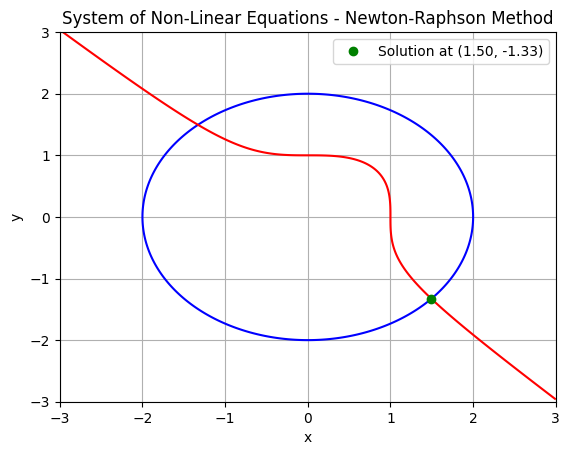

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Example system of non-linear equations
def f1(x):
    return x[0]**2 + x[1]**2 - 4

def f2(x):
    return x[0]**3 + x[1]**3 - 1

# Function vector
def f(x):
    return np.array([f1(x), f2(x)])

# Jacobian matrix with regularization to avoid singularity
def jacobian(f, x, alpha=1e-6):
    n = len(x)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            h = 1e-5
            x_perturbed = np.copy(x)
            x_perturbed[j] += h
            J[i, j] = (f(x_perturbed)[i] - f(x)[i]) / h
    J += alpha * np.eye(n)  # Add a small value to diagonal to regularize
    return J

def newton_system(f, x0, tol=1e-5, max_iter=100):

    iter_count = 0
    while np.linalg.norm(f(x0)) > tol and iter_count < max_iter:
        J = jacobian(f, x0)  # Compute Jacobian
        try:
            delta = np.linalg.solve(J, -f(x0))  # Solve for the update
        except np.linalg.LinAlgError:
            print("Jacobian is singular, cannot solve system.")
            return None
        
        x0 = x0 + delta  # Update the solution
        iter_count += 1
        
        if iter_count == max_iter:
            print("Maximum iterations reached without convergence.")
            return None
    
    return x0

# Initial guess
x0 = np.array([1.0, 1.0])

# Solve the system
root = newton_system(f, x0)

if root is not None:
    print(f"Solution found: x = {root}")
    
    # Plotting the root in 2D space
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z1 = X**2 + Y**2 - 4
    Z2 = X**3 + Y**3 - 1
    
    # Plotting the system
    plt.contour(X, Y, Z1, levels=[0], colors='b', label='f1(x, y) = 0')
    plt.contour(X, Y, Z2, levels=[0], colors='r', label='f2(x, y) = 0')
    plt.plot(root[0], root[1], 'go', label=f'Solution at ({root[0]:.2f}, {root[1]:.2f})')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('System of Non-Linear Equations - Newton-Raphson Method')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")